In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23',)]

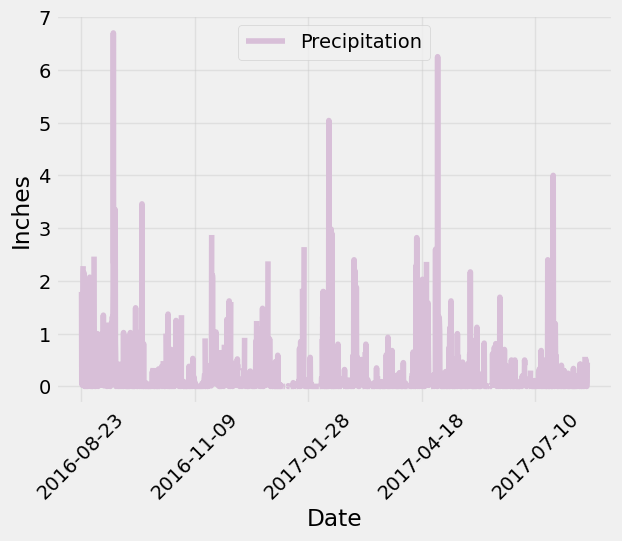

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Use datetime and time delta

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(prcp_data, columns = ['Date', 'Precipitation']) 

# Sort the dataframe by date
measurement_df = measurement_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot('Date','Precipitation', color = 'thistle')
plt.xticks(rotation = 45)
plt.ylabel('Inches')
plt.grid(alpha = .45)
plt.show()

In [13]:
measurement_df.head(20)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
session.query(Station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#func.min of measurement tobs, func.max of tobs, func.average of tobs


mostActiveStation = [
    session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all(),
    session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all(),
    session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
]


mostActiveStation

[[(54.0,)], [(85.0,)], [(71.66378066378067,)]]

In [50]:
# Find the last recorded date of station 'USC00519281'
mostActiveEnd = session.query(func.max(Measurement.date)).\
                    filter(Measurement.station == 'USC00519281').all()
mostActiveEnd

[('2017-08-18',)]

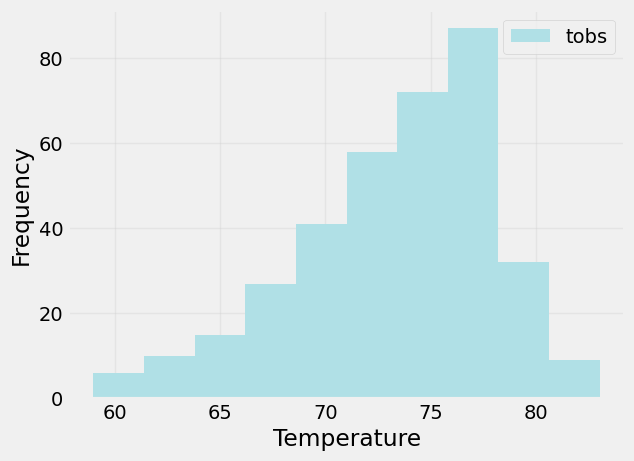

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
yearBeforeEnd = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Query to get the temperatures observed during the last year at station 'USC00519281'
activeTOBS = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= yearBeforeEnd).\
    filter(Measurement.station == 'USC00519281').all()

# Put the data into a dataframe
activeDF = pd.DataFrame(activeTOBS, columns = ['Temperature', 'tobs'])

# Plot the data
activeDF.plot.hist(xlabel = 'Temperature', color = 'powderblue')
plt.grid(alpha = .30)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()